In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# this function helps you to convert the listed data in dataframe into a list (plddt etc.)
def string_to_float_list(string):
    return [float(i) if i!='None' else None for i in string.split(',') ]

# this function helps you to convert the sequence data in dataframe into a list (secondary structure etc.)
def ss_string_to_list(string):
    return [float(i) for i in string.strip('][').split(',')]

def merge_list(list_of_list):
    return [item for sublist in list_of_list for item in sublist]

def filter_function(df):
    filter_list = []
    for i in range(len(df)):
        if df['model_1_ptm_avg_plddt'][i] >= 70 and df['model_2_ptm_avg_plddt'][i] > 70 and df['model_3_ptm_avg_plddt'][i] > 70 and df['model_4_ptm_avg_plddt'][i] > 70 and df['model_5_ptm_avg_plddt'][i] >= 70:
            filter_list.append(True)
        else:
            filter_list.append(False)
    return filter_list

In [83]:
# feature in dataframe:
# ID, name, sequence, sequence_length, structure_avail, [model_name]_avg_plddt
# with model name: disulfide_bond, hydrogen_bond, salt_bridge, surface, SASA, secondary_structure, chirality, phi_angle, psi_angle, omega_angle, plddt

In [84]:
# Define function to calculate secondary structure percentage
def calc_ss_percent(ss_string):
    Helix_len = 0
    Sheet_len = 0
    LoopR_len = 0

    for i in range(len(ss_string)):
        if ss_string[i] == 'H':
            Helix_len += 1
        elif ss_string[i] == 'S':
            Sheet_len += 1
        elif ss_string[i] == 'L':
            LoopR_len += 1
        else:
            return BaseException
    return Helix_len/len(ss_string),Sheet_len/len(ss_string),LoopR_len/len(ss_string)

In [85]:
# read data
df_A501 = pd.read_csv('A501_results.tsv', sep='\t')
df_3DAC = pd.read_csv('3DAC_results.tsv', sep='\t')

df_list = [df_A501,df_3DAC]
tick_list = ["A501","3DAC"]
color_list = ["tab:red","tab:blue"]
cmap_list = ["Reds","Blues"]


# Calculate secondary structure percentage
for j in range(len(df_list)):

    ss_H_list = []
    ss_S_list = []
    ss_L_list = []
    for i in range(df_list[j].shape[0]):
        ss_H,ss_S,ss_L = calc_ss_percent(df_list[j]["secondary_structure_relaxed_model_3_ptm"][i])
        ss_H_list.append(ss_H)
        ss_S_list.append(ss_S)
        ss_L_list.append(ss_L)
    df_list[j]["ss_H"] = ss_H_list
    df_list[j]["ss_S"] = ss_S_list
    df_list[j]["ss_L"] = ss_L_list

print("A501 removed:",df_A501.shape[0]-sum(filter_function(df_A501)))
print("3DAC removed:",df_3DAC.shape[0]-sum(filter_function(df_3DAC)))


A501 removed: 158
3DAC removed: 304


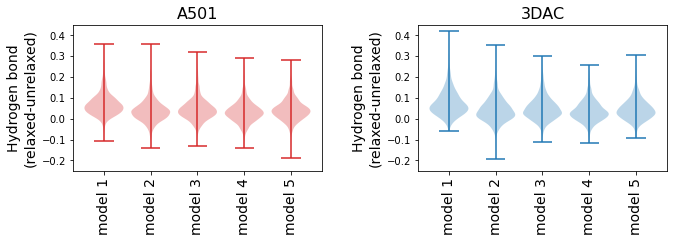

In [96]:
# Hydrogen bond
plt.figure(figsize=(10,4))

plt.subplot(121)

for i in range(5):
    parts = plt.violinplot(df_A501["hydrogen_bond_relaxed_model_%d_ptm"%(i+1)]/df_A501["sequence_length"]-df_A501["hydrogen_bond_unrelaxed_model_%d_ptm"%(i+1)]/df_A501["sequence_length"],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[0])
    parts['cbars'].set_color(color_list[0])
    parts['cmaxes'].set_color(color_list[0])
    parts['cmins'].set_color(color_list[0])

plt.xlim(-0.4,0.6*5-0.2)
plt.ylim(-0.25,0.45)

plt.title("A501",fontsize=16)
plt.ylabel("Hydrogen bond\n(relaxed-unrelaxed)",fontsize=14)
plt.xticks(np.arange(0,0.6*4+0.1,0.6),["model %i"%i for i in range(1,6)],fontsize=14,rotation=90)


plt.subplot(122)

for i in range(5):
    parts = plt.violinplot(df_3DAC["hydrogen_bond_relaxed_model_%d_ptm"%(i+1)]/df_3DAC["sequence_length"]-df_3DAC["hydrogen_bond_unrelaxed_model_%d_ptm"%(i+1)]/df_3DAC["sequence_length"],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[1])
    parts['cbars'].set_color(color_list[1])
    parts['cmaxes'].set_color(color_list[1])
    parts['cmins'].set_color(color_list[1])


plt.xlim(-0.4,0.6*5-0.2)
plt.ylim(-0.25,0.45)

plt.title("3DAC",fontsize=16)
plt.ylabel("Hydrogen bond\n(relaxed-unrelaxed)",fontsize=14)
plt.xticks(np.arange(0,0.6*4+0.1,0.6),["model %i"%i for i in range(1,6)],fontsize=14,rotation=90)


plt.tight_layout(pad=3)



plt.savefig("Figure/Figure_hydrogen_bond.pdf")
plt.savefig("Figure/Figure_hydrogen_bond.png")

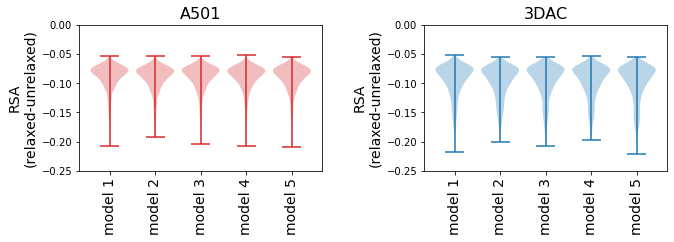

In [87]:
# Hydrogen bond
plt.figure(figsize=(10,4))

plt.subplot(121)

for i in range(5):
    parts = plt.violinplot(df_A501["SASA_relaxed_model_%d_ptm"%(i+1)]/df_A501["surface_relaxed_model_%d_ptm"%(i+1)]-df_A501["SASA_unrelaxed_model_%d_ptm"%(i+1)]/df_A501["surface_unrelaxed_model_%d_ptm"%(i+1)],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[0])
    parts['cbars'].set_color(color_list[0])
    parts['cmaxes'].set_color(color_list[0])
    parts['cmins'].set_color(color_list[0])


plt.xlim(-0.4,0.6*5-0.2)
plt.ylim(-0.25,0)

plt.title("A501",fontsize=16)
plt.ylabel("RSA\n(relaxed-unrelaxed)",fontsize=14)
plt.xticks(np.arange(0,0.6*4+0.1,0.6),["model %i"%i for i in range(1,6)],fontsize=14,rotation=90)


plt.subplot(122)

for i in range(5):
    parts = plt.violinplot(df_3DAC["SASA_relaxed_model_%d_ptm"%(i+1)]/df_3DAC["surface_relaxed_model_%d_ptm"%(i+1)]-df_3DAC["SASA_unrelaxed_model_%d_ptm"%(i+1)]/df_3DAC["surface_unrelaxed_model_%d_ptm"%(i+1)],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[1])
    parts['cbars'].set_color(color_list[1])
    parts['cmaxes'].set_color(color_list[1])
    parts['cmins'].set_color(color_list[1])


plt.xlim(-0.4,0.6*5-0.2)
plt.ylim(-0.25,0)

plt.title("3DAC",fontsize=16)
plt.ylabel("RSA\n(relaxed-unrelaxed)",fontsize=14)
plt.xticks(np.arange(0,0.6*4+0.1,0.6),["model %i"%i for i in range(1,6)],fontsize=14,rotation=90)


plt.tight_layout(pad=3)



plt.savefig("Figure/Figure_RSA.pdf")
plt.savefig("Figure/Figure_RSA.png")

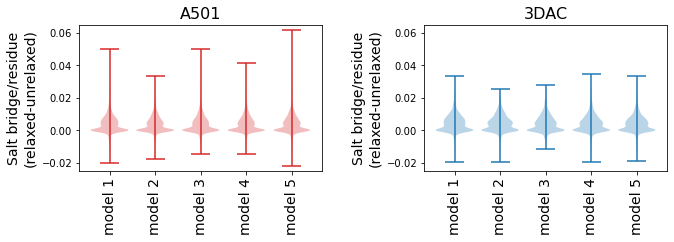

In [88]:
# Hydrogen bond
plt.figure(figsize=(10,4))

plt.subplot(121)

for i in range(5):
    parts = plt.violinplot(df_A501["salt_bridge_relaxed_model_%d_ptm"%(i+1)]/df_A501["sequence_length"]-df_A501["salt_bridge_unrelaxed_model_%d_ptm"%(i+1)]/df_A501["sequence_length"],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[0])
    parts['cbars'].set_color(color_list[0])
    parts['cmaxes'].set_color(color_list[0])
    parts['cmins'].set_color(color_list[0])


plt.xlim(-0.4,0.6*5-0.2)
plt.ylim(-0.025,0.065)

plt.title("A501",fontsize=16)
plt.ylabel("Salt bridge/residue\n(relaxed-unrelaxed)",fontsize=14)
plt.xticks(np.arange(0,0.6*4+0.1,0.6),["model %i"%i for i in range(1,6)],fontsize=14,rotation=90)


plt.subplot(122)

for i in range(5):
    parts = plt.violinplot(df_3DAC["salt_bridge_relaxed_model_%d_ptm"%(i+1)]/df_3DAC["sequence_length"]-df_3DAC["salt_bridge_unrelaxed_model_%d_ptm"%(i+1)]/df_3DAC["sequence_length"],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[1])
    parts['cbars'].set_color(color_list[1])
    parts['cmaxes'].set_color(color_list[1])
    parts['cmins'].set_color(color_list[1])


plt.xlim(-0.4,0.6*5-0.2)
plt.ylim(-0.025,0.065)

plt.title("3DAC",fontsize=16)
plt.ylabel("Salt bridge/residue\n(relaxed-unrelaxed)",fontsize=14)
plt.xticks(np.arange(0,0.6*4+0.1,0.6),["model %i"%i for i in range(1,6)],fontsize=14,rotation=90)


plt.tight_layout(pad=3)



plt.savefig("Figure/Figure_salt_bridge.pdf")
plt.savefig("Figure/Figure_salt_bridge.png")

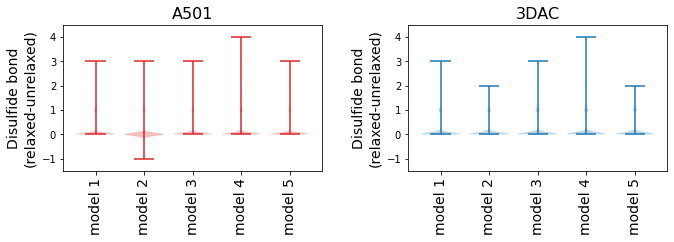

In [97]:
# Hydrogen bond
plt.figure(figsize=(10,4))

plt.subplot(121)

for i in range(5):
    parts = plt.violinplot(df_A501["disulfide_bond_relaxed_model_%d_ptm"%(i+1)]-df_A501["disulfide_bond_unrelaxed_model_%d_ptm"%(i+1)],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[0])
    parts['cbars'].set_color(color_list[0])
    parts['cmaxes'].set_color(color_list[0])
    parts['cmins'].set_color(color_list[0])


plt.xlim(-0.4,0.6*5-0.2)
plt.ylim(-1.5,4.5)

plt.title("A501",fontsize=16)
plt.ylabel("Disulfide bond\n(relaxed-unrelaxed)",fontsize=14)
plt.xticks(np.arange(0,0.6*4+0.1,0.6),["model %i"%i for i in range(1,6)],fontsize=14,rotation=90)


plt.subplot(122)

for i in range(5):
    parts = plt.violinplot(df_3DAC["disulfide_bond_relaxed_model_%d_ptm"%(i+1)]-df_3DAC["disulfide_bond_unrelaxed_model_%d_ptm"%(i+1)],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[1])
    parts['cbars'].set_color(color_list[1])
    parts['cmaxes'].set_color(color_list[1])
    parts['cmins'].set_color(color_list[1])


plt.xlim(-0.4,0.6*5-0.2)
plt.ylim(-1.5,4.5)

plt.title("3DAC",fontsize=16)
plt.ylabel("Disulfide bond\n(relaxed-unrelaxed)",fontsize=14)
plt.xticks(np.arange(0,0.6*4+0.1,0.6),["model %i"%i for i in range(1,6)],fontsize=14,rotation=90)


plt.tight_layout(pad=3)



plt.savefig("Figure/Figure_disulfide_bond.pdf")
plt.savefig("Figure/Figure_disulfide_bond.png")